In [27]:
import numpy as np
import matplotlib.pyplot as plt
import np_info_analysis as na

In [28]:
'''
matlab colors
#DD6734

#0284C0
'''
blue='#DD5544'
red='#0284C0'

In [29]:
main_folder='C:/SPRUP_data_Jenda/2019_03_13_Jenda_microscopy/'
folder=main_folder+'19_05_09_B6/export_np/'

In [30]:
files=[]
#files=[folder+'meas_diff_{:02.0f}_1'.format(f) for f in [2, 3, 5]]
files+=[folder+'meas_diff_02_1',
        folder+'meas_diff_03_1',]
print('lamp on x off:\n  NP100, @600nm')
print('no\tx\ty\tcx\tcy\tC\tstd\tint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    print('{}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

lamp on x off:
  NP100, @600nm
no	x	y	cx	cy	C	std	int	relBg
02	32.57	19.65	6.04	5.81	3.55	0.00096	0.18818	0.00077
n= 17	5.40	5.66	2.17	1.72	0.89	0.00011	0.06433	0.00008
--------------------------------------------------------------------------------
03	27.47	22.71	5.84	5.28	3.48	0.00104	0.18784	0.00084
n= 24	5.85	6.62	1.89	1.75	1.10	0.00018	0.06705	0.00012
--------------------------------------------------------------------------------


In [31]:
nm=[1, 2, 4, 5]
files=[folder+'meas_diff_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]
print('position in dip')
data=[]
data_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

position in dip
no	x	y	cx	cy	C	std	int	relBg
01	32.4	24.5	5.69	5.09	2.91	0.00092	0.17006	0.00074
n= 17	5.4	7.8	1.32	1.98	0.81	0.00007	0.06537	0.00006
--------------------------------------------------------------------------------
02	32.6	19.6	6.04	5.81	3.55	0.00096	0.18818	0.00077
n= 17	5.4	5.7	2.17	1.72	0.89	0.00011	0.06433	0.00008
--------------------------------------------------------------------------------
04	33.6	19.2	6.24	6.32	3.89	0.00070	0.15889	0.00054
n= 13	5.3	5.1	3.88	2.86	1.22	0.00008	0.07154	0.00005
--------------------------------------------------------------------------------
05	38.6	16.2	5.57	6.67	4.28	0.00061	0.14555	0.00047
n= 22	7.5	4.5	2.40	2.35	1.12	0.00011	0.05131	0.00008
--------------------------------------------------------------------------------


<BarContainer object of 4 artists>

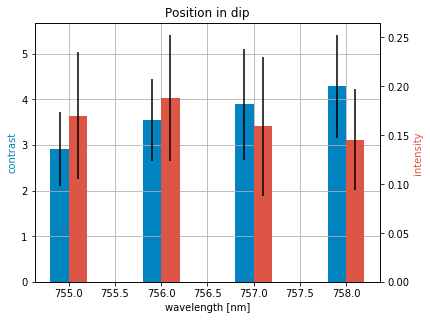

In [35]:
wls=[755, 756, 757, 758]
con=[d[4] for d in data]
con_std=[d[4] for d in data_std]
inten=[d[6] for d in data]
inten_std=[d[6] for d in data_std]
area=[d[0]*d[1] for d in data]


w=0.2

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid('True')
axes.set_title('Position in dip')
axes.set_xlabel('wavelength [nm]')
axes.set_ylabel('contrast', color=red)

axesI = axes.twinx()
axesI.set_ylabel('intensity', color=blue)

axes.bar([s-w/2 for s in wls], con, w, yerr=con_std, color=red, label='x')

axesI.bar([s+w/2 for s in wls], inten, w, yerr=inten_std, color=blue,label='y')
# fig.savefig('C:/Users/bukacek/Desktop/np_images/position_in_dip_750.png' , dpi=300,  bbox_inches='tight')

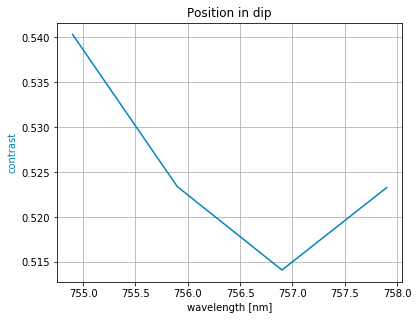

In [39]:
background = [0.5403332568693934, 0.5233846637604816, 0.5140893776139688, 0.5232715346690346]
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid('True')
axes.set_title('Position in dip')
axes.set_xlabel('wavelength [nm]')
axes.set_ylabel('contrast', color=red)
axes.plot([s-w/2 for s in wls], background, color=red, label='x')



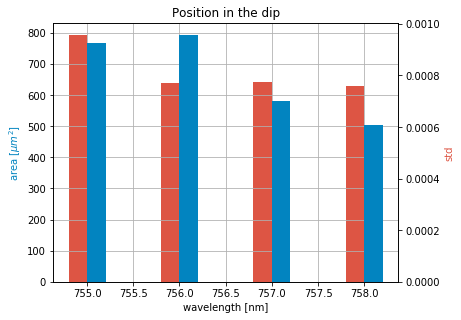

In [12]:
wls=[755, 756, 757, 758]
con=[d[4] for d in data]
inten=[d[6] for d in data]
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid('True')
axes.set_title('Position in the dip')
axes.set_xlabel('wavelength [nm]')
axes.set_ylabel('area [$\mu m^2$]', color=red)

axesI = axes.twinx()
axesI.set_ylabel('std', color=blue)

# axes.plot(wls, area, color='red', label='x')
# axesI.plot(wls, [d[5] for d in data], color='blue', label='y')
axes.bar([s-w/2 for s in wls], area, w, color=blue, label='x')

axesI.bar([s+w/2 for s in wls], [d[5] for d in data], w, color=red,label='y')
fig.savefig('C:/Users/bukacek/Desktop/np_images/position_in_dip_area_std_750.png' , dpi=300,  bbox_inches='tight')

In [16]:
nm=[2, 7, 8, 9]
files=[folder+'meas_diff_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]
print('NP sizes, @756')
data=[]
data_std=[]

print('no\tx\ty\tcx\tcy\tC\tstd\tint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

NP sizes, @756
no	x	y	cx	cy	C	std	int	relBg
02	32.6	19.6	6.04	5.81	3.55	0.00096	0.18818	0.00077
n= 17	5.4	5.7	2.17	1.72	0.89	0.00011	0.06433	0.00008
--------------------------------------------------------------------------------
07	33.7	23.2	3.99	3.43	2.37	0.00085	0.11649	0.00067
n= 22	9.5	8.2	1.16	0.89	0.43	0.00009	0.05473	0.00006
--------------------------------------------------------------------------------
08	31.1	13.7	3.86	4.19	2.69	0.00076	0.05685	0.00061
n= 15	8.5	9.8	0.90	1.34	0.74	0.00009	0.03693	0.00007
--------------------------------------------------------------------------------
09	41.0	9.5	3.21	3.39	2.22	0.00079	0.05512	0.00070
n= 4	8.3	3.2	0.62	0.40	0.51	0.00009	0.03192	0.00003
--------------------------------------------------------------------------------


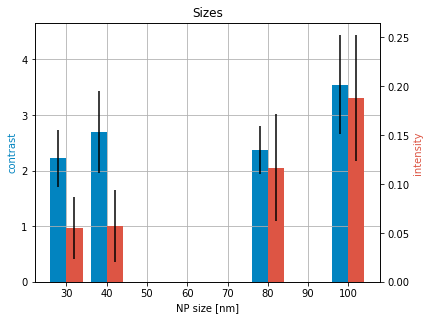

In [22]:
sizes=[100, 80, 40, 30]
con=[d[4] for d in data]
con_std=[d[4] for d in data_std]
inten=[d[6] for d in data]
inten_std=[d[6] for d in data_std]
area=[d[0]*d[1] for d in data]
w=4

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid('True')
axes.set_title('Sizes')
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('contrast', color=red)

axesI = axes.twinx()
axesI.set_ylabel('intensity', color=blue)

axes.bar([s-w/2 for s in sizes], con, w, yerr=con_std, color=red, label='x')
# axes.plot(wls, con, color='red', label='x', ls='--')
axesI.bar([s+w/2 for s in sizes], inten, w, yerr=inten_std, color=blue, label='y')
# axesI.plot(wls, n_inten, color='blue', label='y', ls='--')
fig.savefig('C:/Users/bukacek/Desktop/np_images/sizes_750.png' , dpi=300,  bbox_inches='tight')

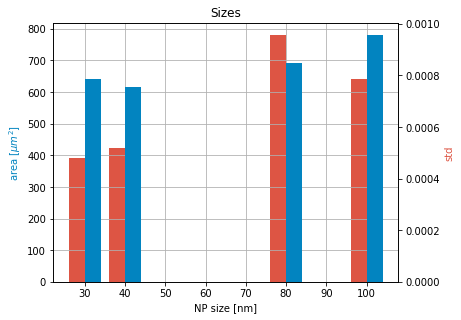

In [23]:

con=[d[4] for d in data]
inten=[d[6] for d in data]
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid('True')
axes.set_title('Sizes')
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('area [$\mu m^2$]', color=red)

axesI = axes.twinx()
axesI.set_ylabel('std', color=blue)

axes.bar([s-w/2 for s in sizes], area, w, color=blue, label='x')

axesI.bar([s+w/2 for s in sizes], [d[5] for d in data], w, color=red,label='y')
fig.savefig('C:/Users/bukacek/Desktop/np_images/sizes_750_area_std.png' , dpi=300,  bbox_inches='tight')

In [24]:
nm=[8 ,14]
files=[folder+'meas_diff_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]
print('focus x remote NP40, @756')
data=[]
data_std=[]

print('no\tx\ty\tcx\tcy\tC\tstd\tint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

focus x remote NP40, @756
no	x	y	cx	cy	C	std	int	relBg
08	31.1	13.7	3.86	4.19	2.69	0.00076	0.05685	0.00061
n= 15	8.5	9.8	0.90	1.34	0.74	0.00009	0.03693	0.00007
--------------------------------------------------------------------------------
14	32.5	24.4	3.06	3.22	2.16	0.00081	0.10073	0.00068
n= 12	7.0	2.8	0.41	0.87	0.55	0.00007	0.06597	0.00009
--------------------------------------------------------------------------------


In [25]:
nm=[14, 15]
files=[folder+'meas_diff_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]
print('NP40 x NP30, @756')
data=[]
data_std=[]

print('no\tx\ty\tcx\tcy\tC\tstd\tint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

NP40 x NP30, @756
no	x	y	cx	cy	C	std	int	relBg
14	32.5	24.4	3.06	3.22	2.16	0.00081	0.10073	0.00068
n= 12	7.0	2.8	0.41	0.87	0.55	0.00007	0.06597	0.00009
--------------------------------------------------------------------------------
15	30.2	21.7	4.01	3.59	2.29	0.00089	0.09323	0.00076
n= 10	4.5	11.9	1.39	1.34	0.61	0.00018	0.07619	0.00013
--------------------------------------------------------------------------------
